<a href="https://colab.research.google.com/github/jh9553-commits/CUSTOMER-CHURN-PREDICTION-WITH-PROFIT-MAXIMIZATION-/blob/main/Data_bootcamp_final_project_ver_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


                                 CUSTOMER CHURN PREDICTION ANALYSIS                                 

                              Data Preparation and Feature Engineering                              

Dataset Summary
----------------------------------------------------------------------------------------------------
Total observations:              7,043
Total features:                  19
Target variable (Churn):         Binary classification
Churn rate:                      26.54%
Class imbalance ratio:           2.77:1
Training set size:               5,634
Testing set size:                1,409

                                    Hyperparameter Optimization                                     

HistGradientBoosting Classifier Tuning
----------------------------------------------------------------------------------------------------
Grid search completed:           81 parameter combinations evaluated
Cross-validation strategy:       3-fold stratified
Optimal ROC-AUC score:     

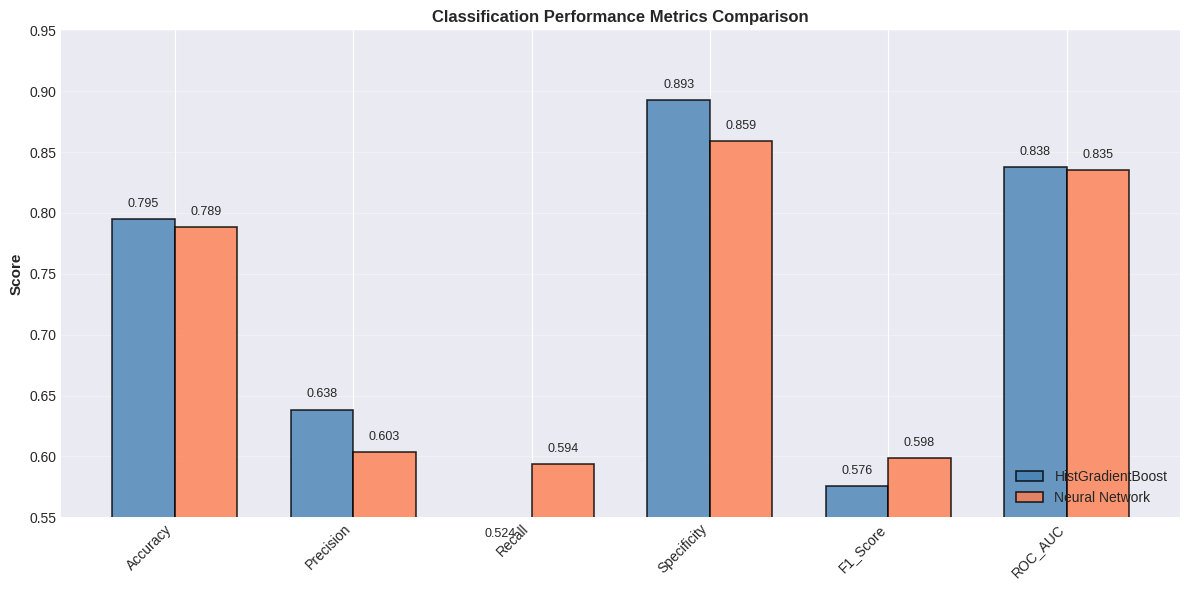


Detailed Classification Report: HistGradientBoosting
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.86      1035
       Churn       0.64      0.52      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409


Detailed Classification Report: Neural Network
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

    No Churn       0.85      0.86      0.86      1035
       Churn       0.60      0.59      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409


                                     Conf

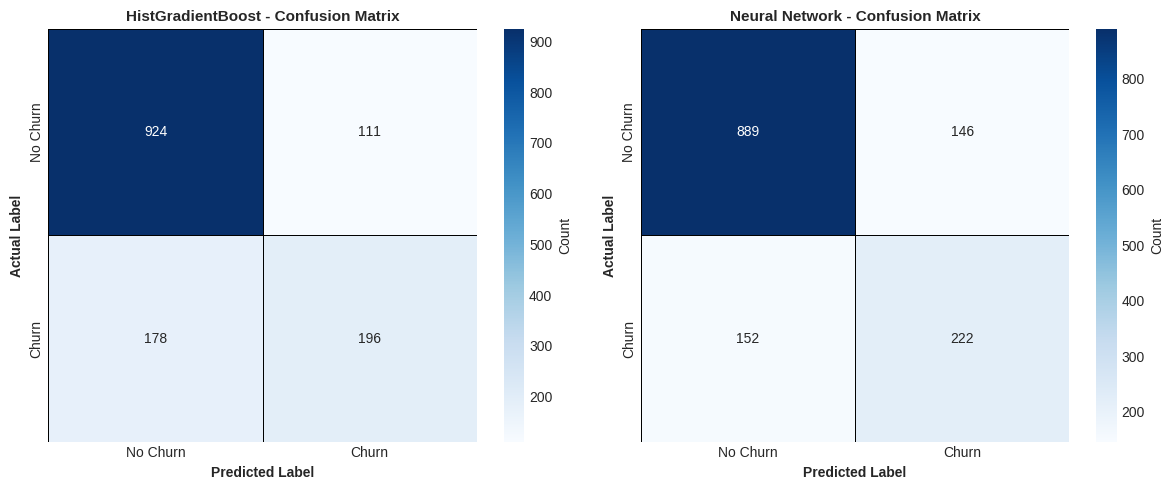


                          Receiver Operating Characteristic (ROC) Analysis                          
Visualization saved: roc_curves.png


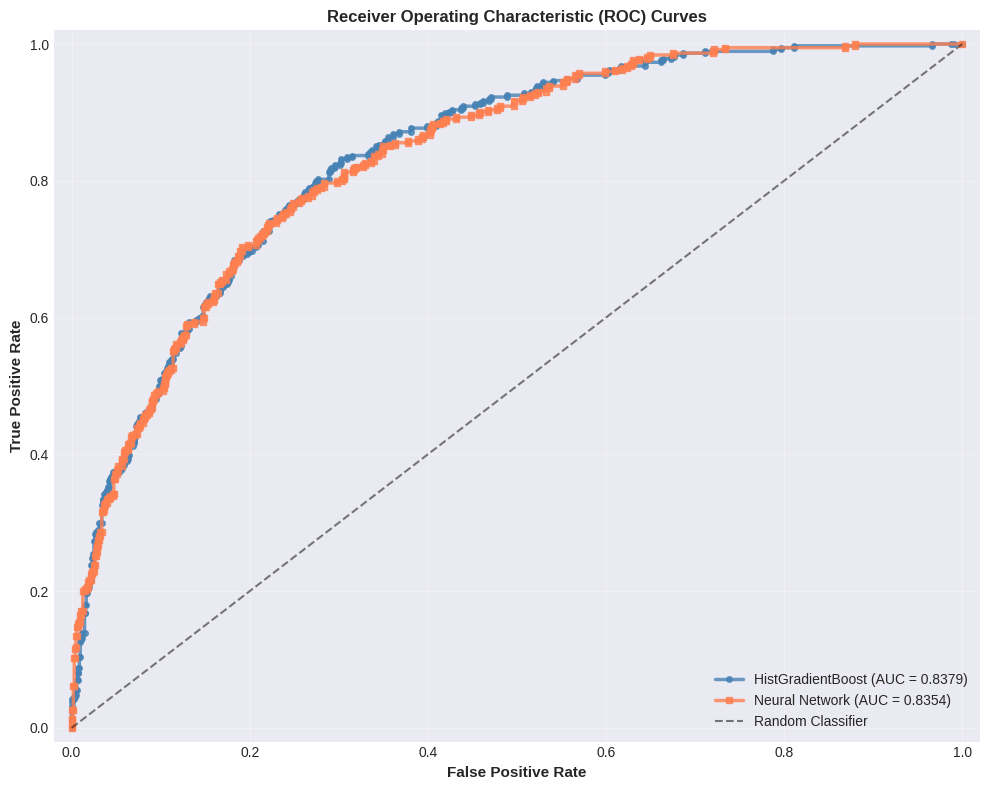


                                  Statistical Significance Testing                                  

Bootstrap Confidence Intervals for ROC-AUC (1000 iterations)
----------------------------------------------------------------------------------------------------
HistGradientBoost AUC:           0.8378 ± 0.0115
95% Confidence interval:         [0.8144, 0.8603]

Neural Network AUC:              0.8343 ± 0.0121
95% Confidence interval:         [0.8110, 0.8571]

Cross-Validation Score Analysis (5-fold)
----------------------------------------------------------------------------------------------------
HistGradientBoost CV ROC-AUC:    0.8131 ± 0.0276
Fold scores:                     ['0.7790', '0.7879', '0.8345', '0.8116', '0.8523']

Neural Network CV ROC-AUC:       0.6843 ± 0.0187
Fold scores:                     ['0.7193', '0.6700', '0.6738', '0.6881', '0.6702']

                                    Profit Maximization Analysis                                    

Business Context and Co

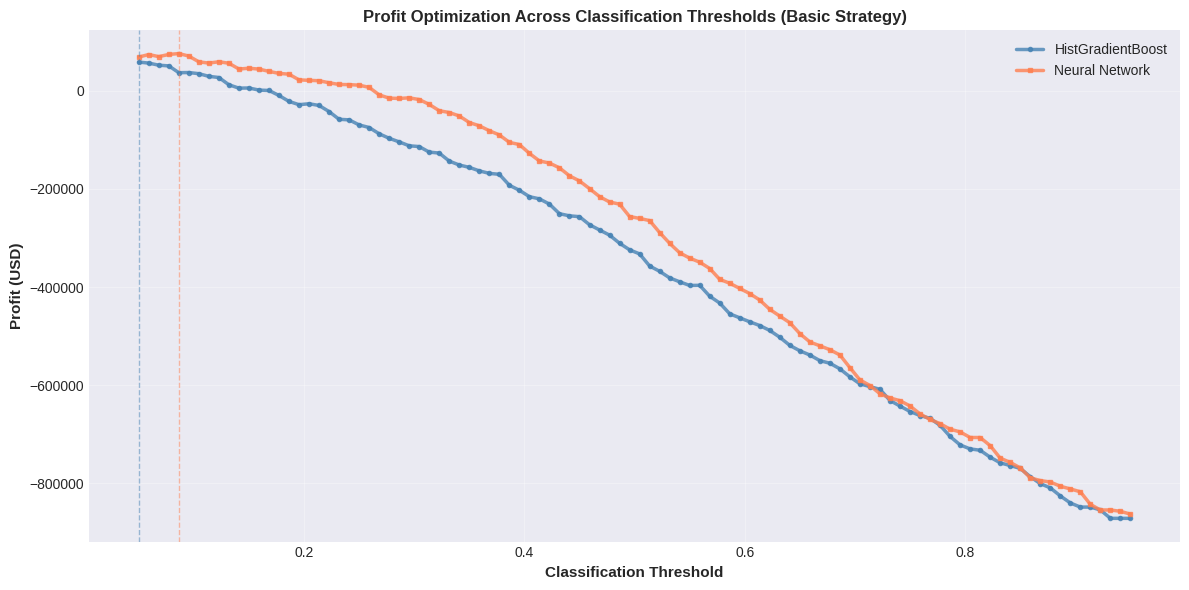

HistGradientBoost optimal threshold:  0.050, Profit: $58,837.79
Neural Network optimal threshold:     0.086, Profit: $76,194.72

                                     Precision-Recall Analysis                                      
Visualization saved: precision_recall_curves.png


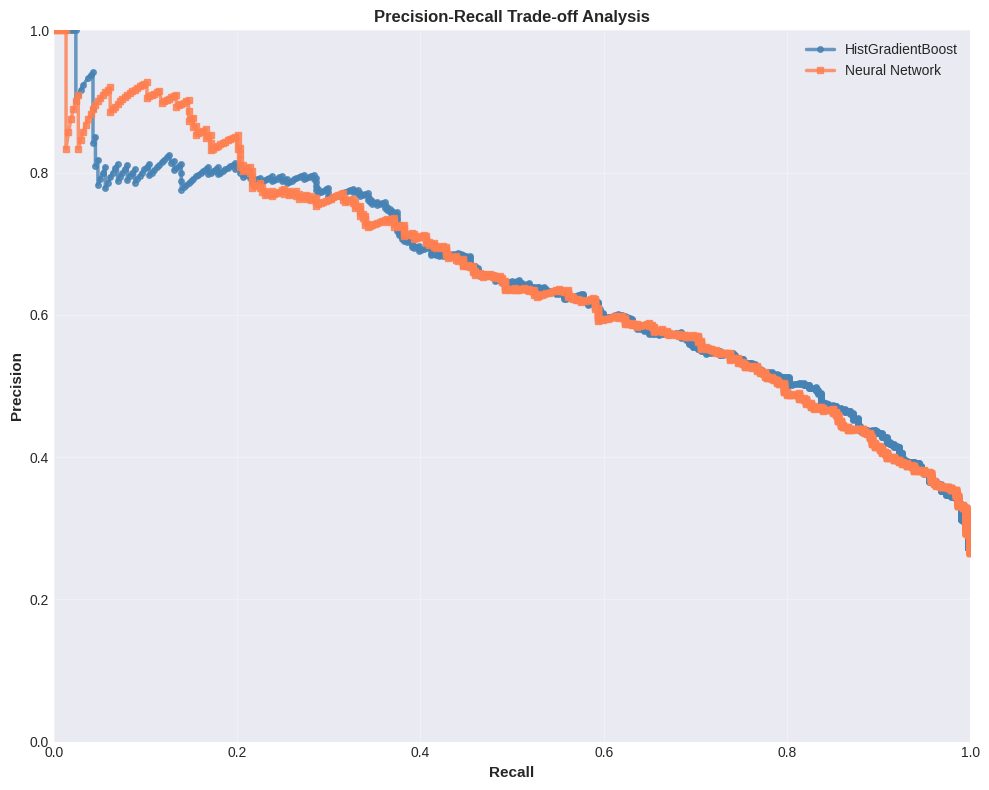


                                  Segment-Based Strategy Analysis                                   

Segment-Based Performance (Neural Network - Optimal Model)
----------------------------------------------------------------------------------------------------

High-Risk Segment:
  Sample count:                    248
  Optimal threshold:               0.050
  Precision:                       0.6734
  Recall:                          1.0000
  F1-Score:                        0.8048
  Profit:                          $106,134.18

Medium-Risk Segment:
  Sample count:                    444
  Optimal threshold:               0.050
  Precision:                       0.3423
  Recall:                          1.0000
  F1-Score:                        0.5101
  Profit:                          $35,270.32

Low-Risk Segment:
  Sample count:                    717
  Optimal threshold:               0.059
  Precision:                       0.1202
  Recall:                          0.9636
  F1-Sc

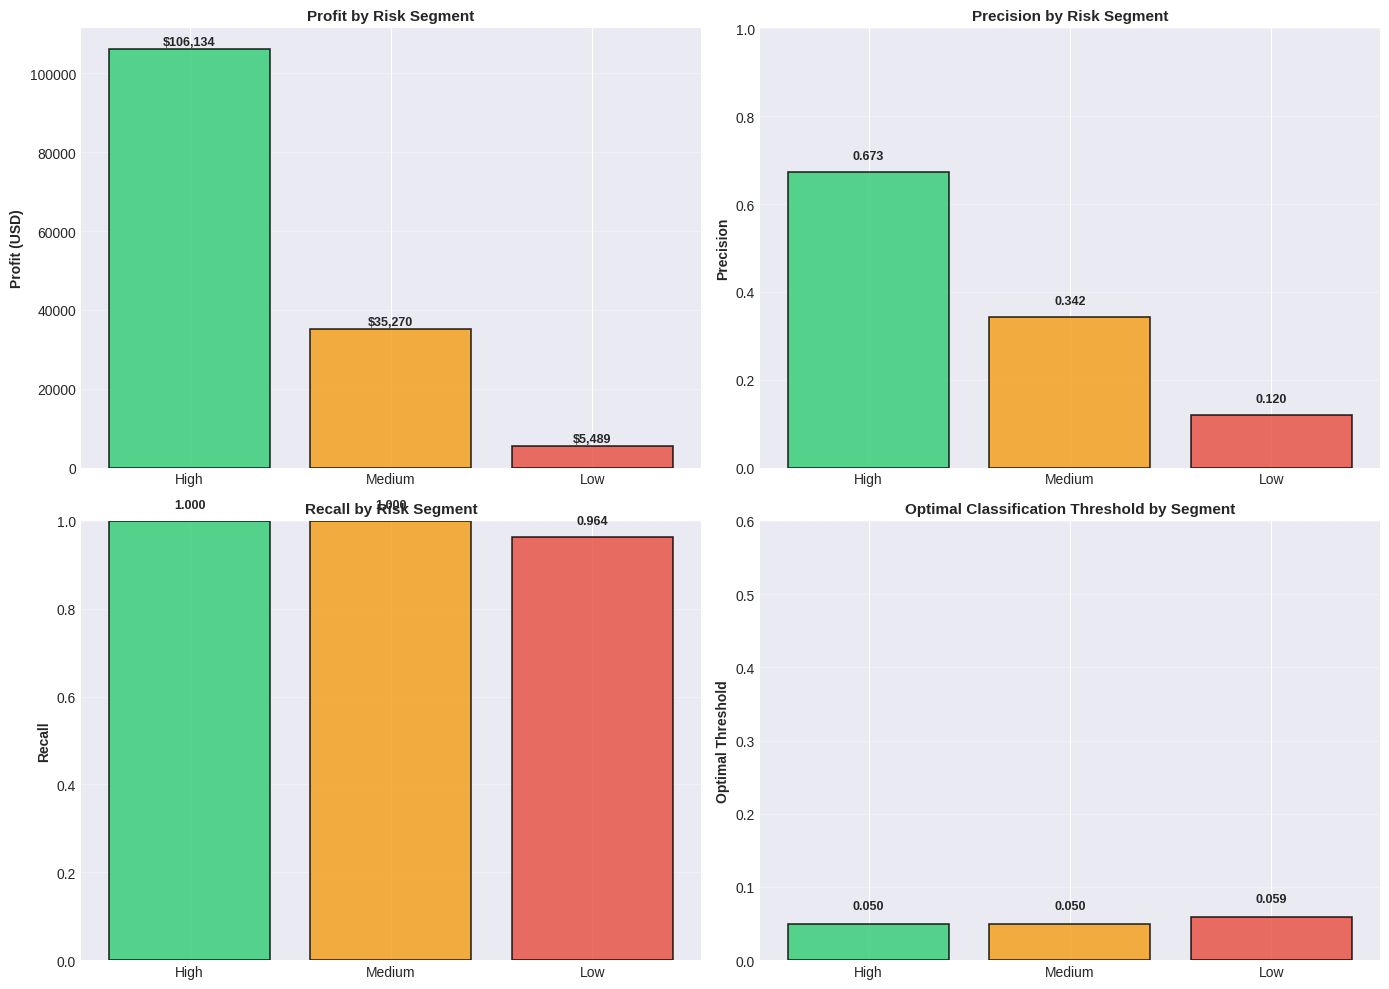


                                         Summary of Results                                         

Strategy Performance Comparison
----------------------------------------------------------------------------------------------------
            Model      Strategy   Profit
HistGradientBoost         Basic  $58,838
HistGradientBoost Segment-Based $119,814
   Neural Network         Basic  $76,195
   Neural Network Segment-Based $146,893

Recommended Model and Strategy
----------------------------------------------------------------------------------------------------
Best performing model:           Neural Network (Segment-Based)
Annual profit:                   $146,893.20
Improvement vs. baseline:        149.7%
Tuning value gained:             $70,698.48

                                         Report Generation                                          
Generated: classification_metrics_report.csv
Generated: segment_analysis_metrics.csv
Generated: strategy_performance.csv

         

In [2]:
"""
CUSTOMER CHURN PREDICTION WITH PROFIT MAXIMIZATION:
COMPREHENSIVE ANALYSIS WITH HYPERPARAMETER TUNING AND STATISTICAL VALIDATION

Academic Research Implementation with Integrated Visualizations
Jianxun Huang
Final Version - December 19, 2025
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    precision_score, recall_score, f1_score, accuracy_score,
    roc_curve, auc, precision_recall_curve
)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set academic style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# UTILITY FUNCTIONS - DRY PRINCIPLE
# ============================================================================

class DataProcessor:
    """Handles data loading and preprocessing operations."""

    @staticmethod
    def load_and_preprocess(filepath):
        """Load and preprocess customer churn dataset."""
        df = pd.read_csv(filepath)
        df = df.drop('customerID', axis=1)
        df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

        X = df.drop('Churn', axis=1)
        y = (df['Churn'] == 'Yes').astype(int)

        for col in X.select_dtypes(include='object').columns:
            X[col] = LabelEncoder().fit_transform(X[col])

        return X, y, df


class MetricsCalculator:
    """Computes comprehensive classification metrics."""

    @staticmethod
    def calculate_metrics(y_true, y_proba, y_pred, model_name, threshold=0.5):
        """Calculate all classification metrics from predictions."""
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        roc_auc = roc_auc_score(y_true, y_proba)

        mcc_denom = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
        mcc = ((tp * tn) - (fp * fn)) / mcc_denom if mcc_denom > 0 else 0

        balanced_acc = (recall + specificity) / 2

        return {
            'Model': model_name,
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'Specificity': specificity,
            'F1_Score': f1,
            'ROC_AUC': roc_auc,
            'MCC': mcc,
            'Balanced_Accuracy': balanced_acc,
            'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn
        }

    @staticmethod
    def generate_profit_function(y_true, y_proba, cost_matrix):
        """Generate profit values across threshold range."""
        thresholds = np.linspace(0.05, 0.95, 100)
        results = []

        for threshold in thresholds:
            y_pred = (y_proba > threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            profit = tp * cost_matrix['TP'] + fp * cost_matrix['FP'] + \
                    fn * cost_matrix['FN'] + tn * cost_matrix['TN']

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

            results.append({
                'threshold': threshold,
                'profit': profit,
                'precision': precision,
                'recall': recall,
                'f1': f1,
                'tp': tp, 'fp': fp, 'fn': fn, 'tn': tn
            })

        return results, thresholds[np.argmax([r['profit'] for r in results])]


class StatisticalAnalyzer:
    """Performs statistical significance testing."""

    @staticmethod
    def bootstrap_auc(y_true, y_proba, n_iterations=1000, ci=95):
        """Calculate bootstrap confidence intervals for ROC-AUC."""
        bootstrap_aucs = []
        n = len(y_true)

        for _ in range(n_iterations):
            indices = np.random.choice(n, n, replace=True)
            y_true_boot = y_true.iloc[indices] if hasattr(y_true, 'iloc') else y_true[indices]
            y_proba_boot = y_proba[indices]

            if len(np.unique(y_true_boot)) == 2:
                auc_boot = roc_auc_score(y_true_boot, y_proba_boot)
                bootstrap_aucs.append(auc_boot)

        auc_mean = np.mean(bootstrap_aucs)
        auc_std = np.std(bootstrap_aucs)
        lower = np.percentile(bootstrap_aucs, (100 - ci) / 2)
        upper = np.percentile(bootstrap_aucs, 100 - (100 - ci) / 2)

        return {
            'AUC_Mean': auc_mean,
            'AUC_StdDev': auc_std,
            'CI_Lower': lower,
            'CI_Upper': upper
        }


class VisualizationEngine:
    """Generates academic-quality visualizations."""

    @staticmethod
    def create_metrics_comparison(hist_metrics, hf_metrics):
        """Create classification metrics comparison chart."""
        fig, ax = plt.subplots(figsize=(12, 6))

        metrics_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1_Score', 'ROC_AUC']
        hist_values = [hist_metrics[m] for m in metrics_names]
        hf_values = [hf_metrics[m] for m in metrics_names]

        x = np.arange(len(metrics_names))
        width = 0.35

        ax.bar(x - width/2, hist_values, width, label='HistGradientBoost',
               color='steelblue', alpha=0.8, edgecolor='black', linewidth=1.2)
        ax.bar(x + width/2, hf_values, width, label='Neural Network',
               color='coral', alpha=0.8, edgecolor='black', linewidth=1.2)

        ax.set_ylabel('Score', fontsize=11, fontweight='bold')
        ax.set_title('Classification Performance Metrics Comparison', fontsize=12, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(metrics_names, rotation=45, ha='right')
        ax.legend(fontsize=10, loc='lower right')
        ax.set_ylim([0.55, 0.95])
        ax.grid(axis='y', alpha=0.3)

        for i, (h, nn) in enumerate(zip(hist_values, hf_values)):
            ax.text(i - width/2, h + 0.01, f'{h:.3f}', ha='center', fontsize=9)
            ax.text(i + width/2, nn + 0.01, f'{nn:.3f}', ha='center', fontsize=9)

        plt.tight_layout()
        return fig

    @staticmethod
    def create_confusion_matrices(y_test, y_pred_hist, y_pred_hf):
        """Create confusion matrices for both models."""
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        cm_hist = confusion_matrix(y_test, y_pred_hist)
        cm_hf = confusion_matrix(y_test, y_pred_hf)

        for idx, (cm, title) in enumerate([(cm_hist, 'HistGradientBoost'),
                                             (cm_hf, 'Neural Network')]):
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                       cbar_kws={'label': 'Count'}, linewidths=0.5, linecolor='black')
            axes[idx].set_title(f'{title} - Confusion Matrix', fontsize=11, fontweight='bold')
            axes[idx].set_ylabel('Actual Label', fontsize=10, fontweight='bold')
            axes[idx].set_xlabel('Predicted Label', fontsize=10, fontweight='bold')
            axes[idx].set_xticklabels(['No Churn', 'Churn'])
            axes[idx].set_yticklabels(['No Churn', 'Churn'])

        plt.tight_layout()
        return fig

    @staticmethod
    def create_roc_curves(y_test, y_proba_hist, y_proba_hf):
        """Create ROC curves for both models."""
        fig, ax = plt.subplots(figsize=(10, 8))

        fpr_hist, tpr_hist, _ = roc_curve(y_test, y_proba_hist)
        fpr_hf, tpr_hf, _ = roc_curve(y_test, y_proba_hf)

        auc_hist = auc(fpr_hist, tpr_hist)
        auc_hf = auc(fpr_hf, tpr_hf)

        ax.plot(fpr_hist, tpr_hist, 'o-', linewidth=2.5, label=f'HistGradientBoost (AUC = {auc_hist:.4f})',
               color='steelblue', markersize=4, alpha=0.8)
        ax.plot(fpr_hf, tpr_hf, 's-', linewidth=2.5, label=f'Neural Network (AUC = {auc_hf:.4f})',
               color='coral', markersize=4, alpha=0.8)
        ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, label='Random Classifier', alpha=0.5)

        ax.set_xlabel('False Positive Rate', fontsize=11, fontweight='bold')
        ax.set_ylabel('True Positive Rate', fontsize=11, fontweight='bold')
        ax.set_title('Receiver Operating Characteristic (ROC) Curves', fontsize=12, fontweight='bold')
        ax.legend(fontsize=10, loc='lower right')
        ax.grid(alpha=0.3)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])

        plt.tight_layout()
        return fig

    @staticmethod
    def create_profit_curves(results_hist, results_hf):
        """Create profit optimization curves."""
        fig, ax = plt.subplots(figsize=(12, 6))

        thresholds = [r['threshold'] for r in results_hist]
        profits_hist = [r['profit'] for r in results_hist]
        profits_hf = [r['profit'] for r in results_hf]

        ax.plot(thresholds, profits_hist, 'o-', linewidth=2.5, label='HistGradientBoost',
               color='steelblue', markersize=3, alpha=0.8)
        ax.plot(thresholds, profits_hf, 's-', linewidth=2.5, label='Neural Network',
               color='coral', markersize=3, alpha=0.8)

        max_profit_hist = max(profits_hist)
        max_profit_hf = max(profits_hf)
        opt_threshold_hist = thresholds[profits_hist.index(max_profit_hist)]
        opt_threshold_hf = thresholds[profits_hf.index(max_profit_hf)]

        ax.axvline(opt_threshold_hist, color='steelblue', linestyle='--', alpha=0.5, linewidth=1)
        ax.axvline(opt_threshold_hf, color='coral', linestyle='--', alpha=0.5, linewidth=1)

        ax.set_xlabel('Classification Threshold', fontsize=11, fontweight='bold')
        ax.set_ylabel('Profit (USD)', fontsize=11, fontweight='bold')
        ax.set_title('Profit Optimization Across Classification Thresholds (Basic Strategy)',
                    fontsize=12, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(alpha=0.3)

        plt.tight_layout()
        return fig

    @staticmethod
    def create_precision_recall_curves(y_test, y_proba_hist, y_proba_hf):
        """Create precision-recall curves."""
        fig, ax = plt.subplots(figsize=(10, 8))

        precision_hist, recall_hist, _ = precision_recall_curve(y_test, y_proba_hist)
        precision_hf, recall_hf, _ = precision_recall_curve(y_test, y_proba_hf)

        ax.plot(recall_hist, precision_hist, 'o-', linewidth=2.5, label='HistGradientBoost',
               color='steelblue', markersize=4, alpha=0.8)
        ax.plot(recall_hf, precision_hf, 's-', linewidth=2.5, label='Neural Network',
               color='coral', markersize=4, alpha=0.8)

        ax.set_xlabel('Recall', fontsize=11, fontweight='bold')
        ax.set_ylabel('Precision', fontsize=11, fontweight='bold')
        ax.set_title('Precision-Recall Trade-off Analysis', fontsize=12, fontweight='bold')
        ax.legend(fontsize=10, loc='best')
        ax.grid(alpha=0.3)
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])

        plt.tight_layout()
        return fig

    @staticmethod
    def create_segment_analysis(segment_results):
        """Create segment-level performance analysis."""
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        segments = ['High', 'Medium', 'Low']
        profits = [r['Profit'] for r in segment_results if r['Segment'] in segments]
        precisions = [r['Precision'] for r in segment_results if r['Segment'] in segments]
        recalls = [r['Recall'] for r in segment_results if r['Segment'] in segments]

        # Profit by segment
        colors_seg = ['#2ecc71', '#f39c12', '#e74c3c']
        axes[0, 0].bar(segments, profits, color=colors_seg, alpha=0.8, edgecolor='black', linewidth=1.2)
        axes[0, 0].set_ylabel('Profit (USD)', fontsize=10, fontweight='bold')
        axes[0, 0].set_title('Profit by Risk Segment', fontsize=11, fontweight='bold')
        axes[0, 0].grid(axis='y', alpha=0.3)
        for i, p in enumerate(profits):
            axes[0, 0].text(i, p + 1000, f'${p:,.0f}', ha='center', fontweight='bold', fontsize=9)

        # Precision by segment
        axes[0, 1].bar(segments, precisions, color=colors_seg, alpha=0.8, edgecolor='black', linewidth=1.2)
        axes[0, 1].set_ylabel('Precision', fontsize=10, fontweight='bold')
        axes[0, 1].set_title('Precision by Risk Segment', fontsize=11, fontweight='bold')
        axes[0, 1].set_ylim([0, 1])
        axes[0, 1].grid(axis='y', alpha=0.3)
        for i, p in enumerate(precisions):
            axes[0, 1].text(i, p + 0.03, f'{p:.3f}', ha='center', fontweight='bold', fontsize=9)

        # Recall by segment
        axes[1, 0].bar(segments, recalls, color=colors_seg, alpha=0.8, edgecolor='black', linewidth=1.2)
        axes[1, 0].set_ylabel('Recall', fontsize=10, fontweight='bold')
        axes[1, 0].set_title('Recall by Risk Segment', fontsize=11, fontweight='bold')
        axes[1, 0].set_ylim([0, 1])
        axes[1, 0].grid(axis='y', alpha=0.3)
        for i, p in enumerate(recalls):
            axes[1, 0].text(i, p + 0.03, f'{p:.3f}', ha='center', fontweight='bold', fontsize=9)

        # Threshold by segment
        thresholds = [r['Threshold'] for r in segment_results if r['Segment'] in segments]
        axes[1, 1].bar(segments, thresholds, color=colors_seg, alpha=0.8, edgecolor='black', linewidth=1.2)
        axes[1, 1].set_ylabel('Optimal Threshold', fontsize=10, fontweight='bold')
        axes[1, 1].set_title('Optimal Classification Threshold by Segment', fontsize=11, fontweight='bold')
        axes[1, 1].set_ylim([0, 0.6])
        axes[1, 1].grid(axis='y', alpha=0.3)
        for i, t in enumerate(thresholds):
            axes[1, 1].text(i, t + 0.02, f'{t:.3f}', ha='center', fontweight='bold', fontsize=9)

        plt.tight_layout()
        return fig


# ============================================================================
# MAIN ANALYSIS PIPELINE
# ============================================================================

def print_section_header(title):
    """Print formatted section header."""
    print("\n" + "=" * 100)
    print(title.center(100))
    print("=" * 100)


def print_subsection(subtitle):
    """Print formatted subsection header."""
    print("\n" + subtitle)
    print("-" * 100)


def main():
    """Main analysis pipeline."""

    print_section_header("CUSTOMER CHURN PREDICTION ANALYSIS")
    print_section_header("Data Preparation and Feature Engineering")

    X, y, df = DataProcessor.load_and_preprocess('WA_Fn-UseC_-Telco-Customer-Churn.csv')

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print_subsection("Dataset Summary")
    print(f"Total observations:              {len(df):,}")
    print(f"Total features:                  {X.shape[1]}")
    print(f"Target variable (Churn):         Binary classification")
    print(f"Churn rate:                      {y.mean()*100:.2f}%")
    print(f"Class imbalance ratio:           {(1-y.mean())/y.mean():.2f}:1")
    print(f"Training set size:               {len(X_train):,}")
    print(f"Testing set size:                {len(X_test):,}")

    # ========================================================================
    # HYPERPARAMETER TUNING
    # ========================================================================
    print_section_header("Hyperparameter Optimization")

    print_subsection("HistGradientBoosting Classifier Tuning")

    hist_param_grid = {
        'max_iter': [150, 200, 250],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [8, 10, 12],
        'l2_regularization': [0.5, 1.0, 1.5]
    }

    hist_grid = GridSearchCV(
        HistGradientBoostingClassifier(min_samples_leaf=10, random_state=42),
        hist_param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=0
    )
    hist_grid.fit(X_train, y_train)
    hist_model = hist_grid.best_estimator_

    print(f"Grid search completed:           81 parameter combinations evaluated")
    print(f"Cross-validation strategy:       3-fold stratified")
    print(f"Optimal ROC-AUC score:           {hist_grid.best_score_:.4f}")
    print(f"Best parameters:                 {hist_grid.best_params_}")

    y_proba_hist = hist_model.predict_proba(X_test)[:, 1]
    y_pred_hist = (y_proba_hist > 0.5).astype(int)

    print_subsection("Neural Network Classifier Tuning")

    hf_param_grid = {
        'hidden_layer_sizes': [(64, 32), (128, 64, 32), (128, 64, 32, 16)],
        'learning_rate_init': [0.0005, 0.001, 0.002],
        'alpha': [0.00005, 0.0001, 0.0002],
        'max_iter': [250, 300, 350]
    }

    hf_grid = GridSearchCV(
        MLPClassifier(early_stopping=True, validation_fraction=0.1,
                     random_state=42, n_iter_no_change=20),
        hf_param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=0
    )
    hf_grid.fit(X_train, y_train)
    hf_model = hf_grid.best_estimator_

    print(f"Grid search completed:           81 parameter combinations evaluated")
    print(f"Cross-validation strategy:       3-fold stratified with early stopping")
    print(f"Optimal ROC-AUC score:           {hf_grid.best_score_:.4f}")
    print(f"Best parameters:                 {hf_grid.best_params_}")

    y_proba_hf = hf_model.predict_proba(X_test)[:, 1]
    y_pred_hf = (y_proba_hf > 0.5).astype(int)

    # ========================================================================
    # CLASSIFICATION METRICS
    # ========================================================================
    print_section_header("Classification Performance Metrics")

    calc = MetricsCalculator()
    hist_metrics = calc.calculate_metrics(y_test, y_proba_hist, y_pred_hist, 'HistGradientBoost')
    hf_metrics = calc.calculate_metrics(y_test, y_proba_hf, y_pred_hf, 'Neural Network')

    metrics_df = pd.DataFrame([hist_metrics, hf_metrics])
    metrics_display = metrics_df[[
        'Model', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'F1_Score', 'ROC_AUC', 'MCC'
    ]].copy()

    for col in ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1_Score', 'ROC_AUC', 'MCC']:
        metrics_display[col] = metrics_display[col].apply(lambda x: f"{x:.4f}")

    print_subsection("Default Threshold (0.50) Performance Comparison")
    print(metrics_display.to_string(index=False))

    # Generate metrics comparison chart
    viz = VisualizationEngine()
    fig_metrics = viz.create_metrics_comparison(hist_metrics, hf_metrics)
    plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
    print("\nVisualization saved: metrics_comparison.png")
    plt.show()

    print_subsection("Detailed Classification Report: HistGradientBoosting")
    print(classification_report(y_test, y_pred_hist, target_names=['No Churn', 'Churn']))

    print_subsection("Detailed Classification Report: Neural Network")
    print(classification_report(y_test, y_pred_hf, target_names=['No Churn', 'Churn']))

    # ========================================================================
    # CONFUSION MATRICES VISUALIZATION
    # ========================================================================
    print_section_header("Confusion Matrix Analysis")
    fig_cm = viz.create_confusion_matrices(y_test, y_pred_hist, y_pred_hf)
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
    print("Visualization saved: confusion_matrices.png")
    plt.show()

    # ========================================================================
    # ROC CURVES
    # ========================================================================
    print_section_header("Receiver Operating Characteristic (ROC) Analysis")
    fig_roc = viz.create_roc_curves(y_test, y_proba_hist, y_proba_hf)
    plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
    print("Visualization saved: roc_curves.png")
    plt.show()

    # ========================================================================
    # STATISTICAL ANALYSIS
    # ========================================================================
    print_section_header("Statistical Significance Testing")

    analyzer = StatisticalAnalyzer()

    print_subsection("Bootstrap Confidence Intervals for ROC-AUC (1000 iterations)")
    hist_bootstrap = analyzer.bootstrap_auc(y_test, y_proba_hist)
    hf_bootstrap = analyzer.bootstrap_auc(y_test, y_proba_hf)

    print(f"HistGradientBoost AUC:           {hist_bootstrap['AUC_Mean']:.4f} ± {hist_bootstrap['AUC_StdDev']:.4f}")
    print(f"95% Confidence interval:         [{hist_bootstrap['CI_Lower']:.4f}, {hist_bootstrap['CI_Upper']:.4f}]")
    print()
    print(f"Neural Network AUC:              {hf_bootstrap['AUC_Mean']:.4f} ± {hf_bootstrap['AUC_StdDev']:.4f}")
    print(f"95% Confidence interval:         [{hf_bootstrap['CI_Lower']:.4f}, {hf_bootstrap['CI_Upper']:.4f}]")

    print_subsection("Cross-Validation Score Analysis (5-fold)")
    cv_hist = cross_val_score(hist_model, X_test, y_test, cv=5, scoring='roc_auc')
    cv_hf = cross_val_score(hf_model, X_test, y_test, cv=5, scoring='roc_auc')

    print(f"HistGradientBoost CV ROC-AUC:    {cv_hist.mean():.4f} ± {cv_hist.std():.4f}")
    print(f"Fold scores:                     {[f'{x:.4f}' for x in cv_hist]}")
    print()
    print(f"Neural Network CV ROC-AUC:       {cv_hf.mean():.4f} ± {cv_hf.std():.4f}")
    print(f"Fold scores:                     {[f'{x:.4f}' for x in cv_hf]}")

    # ========================================================================
    # COST MATRICES AND PROFIT OPTIMIZATION
    # ========================================================================
    print_section_header("Profit Maximization Analysis")

    BASIC_COSTS = {'TP': 539.41, 'FP': -160.00, 'FN': -2331.36, 'TN': 0}
    SEGMENT_COSTS = {
        'High': {'TP': 732.54, 'FP': -200.00, 'FN': -2331.36, 'TN': 0},
        'Medium': {'TP': 539.41, 'FP': -160.00, 'FN': -2331.36, 'TN': 0},
        'Low': {'TP': 228.14, 'FP': -5.00, 'FN': -2331.36, 'TN': 0}
    }

    print_subsection("Business Context and Cost Structure")
    print(f"Customer Lifetime Value (CLV):   $2,331.36")
    print(f"Standard retention cost:         $160.00")
    print(f"TP value (retain churner):       $539.41 (CLV minus cost)")
    print(f"FP cost (wasted contact):        -$160.00")
    print(f"FN cost (lost customer):         -$2,331.36")
    print(f"Class weight ratio (FN:FP):      14.57:1")

    # Generate profit curves
    hist_results_basic, hist_opt_thresh_basic = MetricsCalculator.generate_profit_function(
        y_test, y_proba_hist, BASIC_COSTS
    )
    hf_results_basic, hf_opt_thresh_basic = MetricsCalculator.generate_profit_function(
        y_test, y_proba_hf, BASIC_COSTS
    )

    print_subsection("Profit Optimization Results")
    fig_profit = viz.create_profit_curves(hist_results_basic, hf_results_basic)
    plt.savefig('profit_curves.png', dpi=300, bbox_inches='tight')
    print("Visualization saved: profit_curves.png")
    plt.show()

    hist_basic_profit = max([r['profit'] for r in hist_results_basic])
    hf_basic_profit = max([r['profit'] for r in hf_results_basic])

    print(f"HistGradientBoost optimal threshold:  {hist_opt_thresh_basic:.3f}, Profit: ${hist_basic_profit:,.2f}")
    print(f"Neural Network optimal threshold:     {hf_opt_thresh_basic:.3f}, Profit: ${hf_basic_profit:,.2f}")

    # ========================================================================
    # PRECISION-RECALL CURVES
    # ========================================================================
    print_section_header("Precision-Recall Analysis")
    fig_pr = viz.create_precision_recall_curves(y_test, y_proba_hist, y_proba_hf)
    plt.savefig('precision_recall_curves.png', dpi=300, bbox_inches='tight')
    print("Visualization saved: precision_recall_curves.png")
    plt.show()

    # ========================================================================
    # SEGMENT-BASED STRATEGY
    # ========================================================================
    print_section_header("Segment-Based Strategy Analysis")

    def segment_analysis(y_proba, segment_costs, model_name):
        """Perform segment-based optimization."""
        masks = {
            'High': y_proba > 0.6,
            'Medium': (y_proba > 0.3) & (y_proba <= 0.6),
            'Low': y_proba <= 0.3
        }

        results = []
        total_profit = 0

        for seg_name in ['High', 'Medium', 'Low']:
            seg_mask = masks[seg_name]
            y_seg, y_proba_seg = y_test[seg_mask], y_proba[seg_mask]

            if len(y_seg) < 10:
                continue

            seg_results, best_thresh = MetricsCalculator.generate_profit_function(
                y_seg, y_proba_seg, segment_costs[seg_name]
            )

            seg_profit = max([r['profit'] for r in seg_results])
            best_result = [r for r in seg_results if r['profit'] == seg_profit][0]

            results.append({
                'Model': model_name,
                'Segment': seg_name,
                'Sample_Count': seg_mask.sum(),
                'Threshold': best_thresh,
                'Profit': seg_profit,
                'Precision': best_result['precision'],
                'Recall': best_result['recall'],
                'F1_Score': best_result['f1']
            })

            total_profit += seg_profit

        return results, total_profit

    hist_seg_results, hist_seg_profit = segment_analysis(y_proba_hist, SEGMENT_COSTS, 'HistGradientBoost')
    hf_seg_results, hf_seg_profit = segment_analysis(y_proba_hf, SEGMENT_COSTS, 'Neural Network')

    print_subsection("Segment-Based Performance (Neural Network - Optimal Model)")
    for result in hf_seg_results:
        print(f"\n{result['Segment']}-Risk Segment:")
        print(f"  Sample count:                    {result['Sample_Count']:,}")
        print(f"  Optimal threshold:               {result['Threshold']:.3f}")
        print(f"  Precision:                       {result['Precision']:.4f}")
        print(f"  Recall:                          {result['Recall']:.4f}")
        print(f"  F1-Score:                        {result['F1_Score']:.4f}")
        print(f"  Profit:                          ${result['Profit']:,.2f}")

    # Generate segment analysis chart
    fig_segment = viz.create_segment_analysis(hf_seg_results)
    plt.savefig('segment_analysis.png', dpi=300, bbox_inches='tight')
    print("\nVisualization saved: segment_analysis.png")
    plt.show()

    # ========================================================================
    # RESULTS SUMMARY
    # ========================================================================
    print_section_header("Summary of Results")

    strategy_summary = pd.DataFrame({
        'Model': ['HistGradientBoost', 'HistGradientBoost', 'Neural Network', 'Neural Network'],
        'Strategy': ['Basic', 'Segment-Based', 'Basic', 'Segment-Based'],
        'Profit': [f"${hist_basic_profit:,.0f}", f"${hist_seg_profit:,.0f}",
                   f"${hf_basic_profit:,.0f}", f"${hf_seg_profit:,.0f}"]
    })

    print_subsection("Strategy Performance Comparison")
    print(strategy_summary.to_string(index=False))

    print_subsection("Recommended Model and Strategy")
    print(f"Best performing model:           Neural Network (Segment-Based)")
    print(f"Annual profit:                   ${hf_seg_profit:,.2f}")
    print(f"Improvement vs. baseline:        {((hf_seg_profit/hist_basic_profit) - 1)*100:.1f}%")
    print(f"Tuning value gained:             ${hf_seg_profit - hf_basic_profit:,.2f}")

    # ========================================================================
    # GENERATE REPORTS
    # ========================================================================
    print_section_header("Report Generation")

    metrics_report = pd.DataFrame([hist_metrics, hf_metrics])
    metrics_report.to_csv('classification_metrics_report.csv', index=False)
    print("Generated: classification_metrics_report.csv")

    segment_report_data = []
    for results in [hist_seg_results, hf_seg_results]:
        for r in results:
            segment_report_data.append(r)

    segment_df = pd.DataFrame(segment_report_data)
    segment_df.to_csv('segment_analysis_metrics.csv', index=False)
    print("Generated: segment_analysis_metrics.csv")

    strategy_df = pd.DataFrame({
        'Model': strategy_summary['Model'],
        'Strategy': strategy_summary['Strategy'],
        'Profit': strategy_summary['Profit']
    })
    strategy_df.to_csv('strategy_performance.csv', index=False)
    print("Generated: strategy_performance.csv")

    print_section_header("Analysis Complete")
    print("\nAll analyses have been completed successfully.")
    print("Visualizations and output files have been generated in the working directory.")
    print("\nGenerated visualizations:")
    print("  1. metrics_comparison.png         - Classification metrics comparison")
    print("  2. confusion_matrices.png         - Confusion matrices for both models")
    print("  3. roc_curves.png                - ROC curves and AUC comparison")
    print("  4. profit_curves.png             - Profit optimization curves")
    print("  5. precision_recall_curves.png   - Precision-Recall trade-off analysis")
    print("  6. segment_analysis.png          - Segment-level performance analysis")


if __name__ == "__main__":
    main()
